In [1]:
#Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import *
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from uncertainties import *

In [2]:
#Reading data

tab18 = pd.read_csv('data/tab18.csv')
tab19 = pd.read_csv('data/tab19.csv')
tab20 = pd.read_csv('data/tab20.csv')
tab21 = pd.read_csv('data/tab21.csv')
tab22 = pd.read_csv('data/tab22.csv')
galo = pd.read_csv('data/galo.csv')

In [3]:
#Calculations

tab18['r'] = 10**(0.2*(tab18['m'] - 0.6 + 5 - tab18['A']))

tab18['x'] = tab18['r'] * np.cos(np.deg2rad(tab18['l'])) * np.cos(np.deg2rad(tab18['b']))
tab18['y'] = tab18['r'] * np.sin(np.deg2rad(tab18['l'])) * np.cos(np.deg2rad(tab18['b']))
tab18['z'] = tab18['r'] * np.sin(np.deg2rad(tab18['b']))


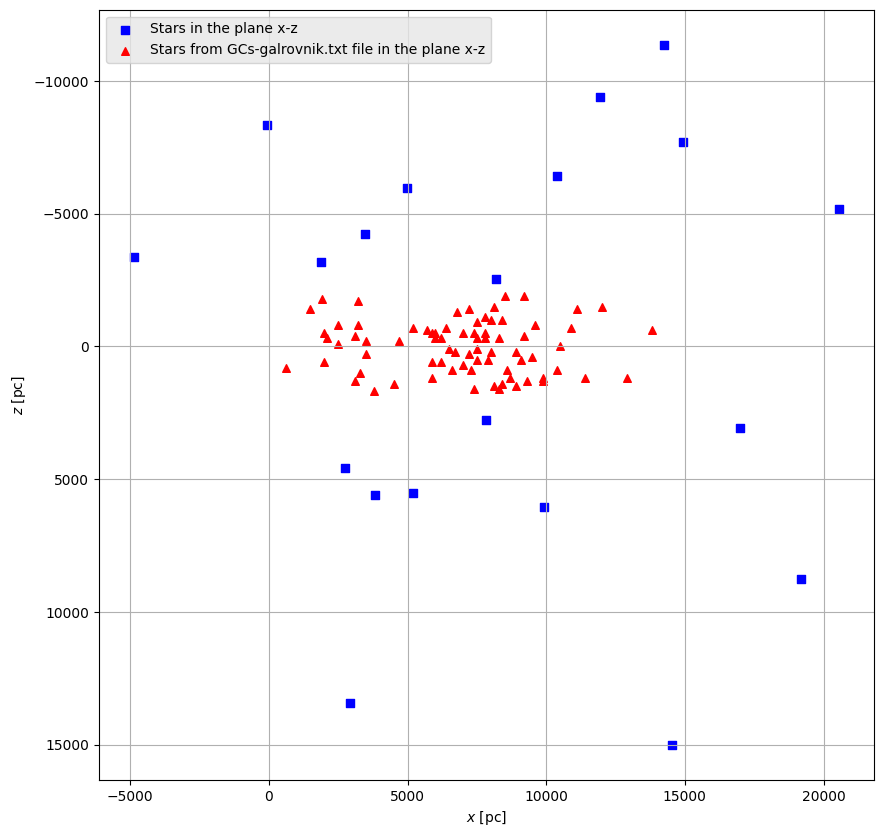

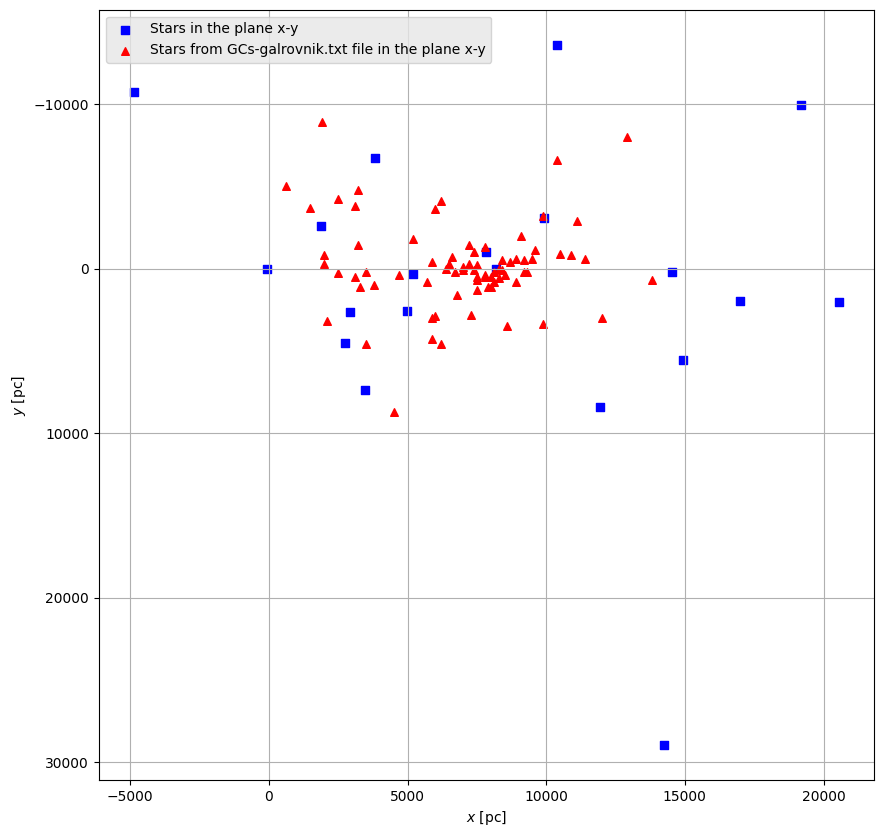

11801.62853997176
11566.079014686326
8440.168124738144
8482.182793415735
7018.606458378752
7018.606458378752
6930.263657529985
6933.6218915243735


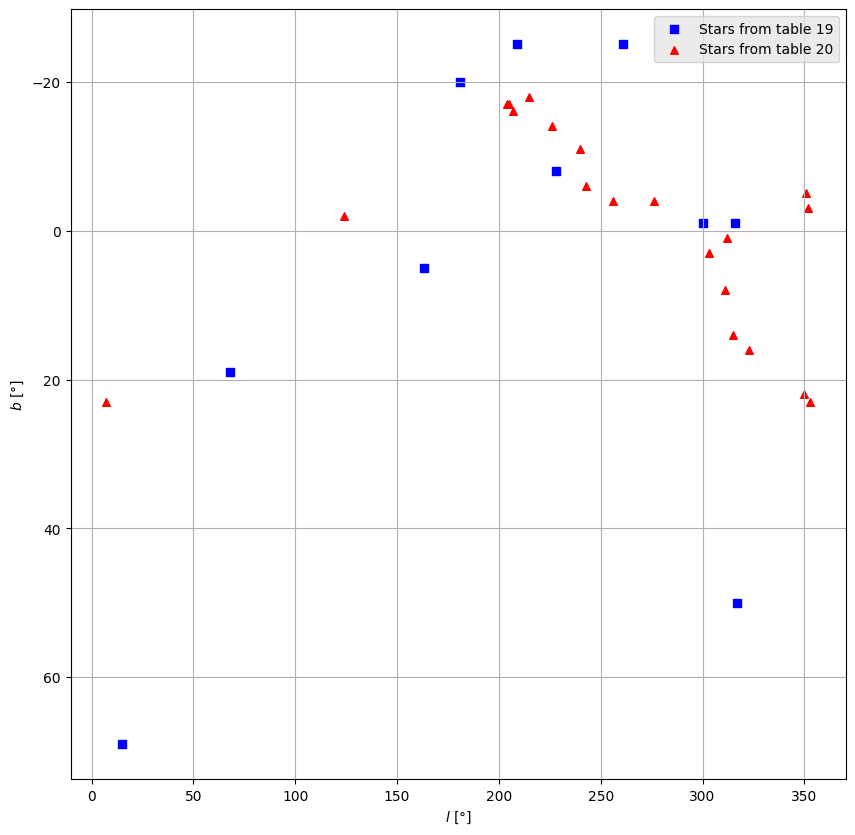

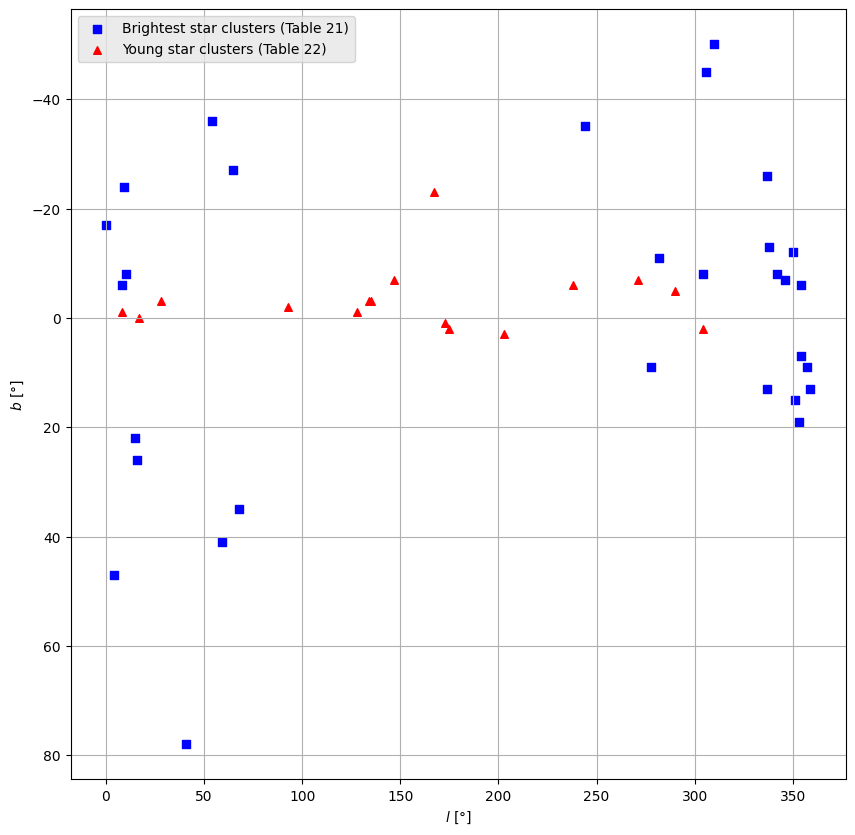

In [4]:
#Plotting

fig, ax = plt.subplots(figsize=(10,10))

ax.grid('Positions of the stars from table 18')
ax.set_title('')

ax.title.set_fontsize(20)
ax.set_xlabel('$x$ [pc]')
ax.xaxis.label.set_fontsize(10)
ax.set_ylabel('$z$ [pc]')
ax.yaxis.label.set_fontsize(10)
ax.invert_yaxis()

ax.scatter(tab18['x'], tab18['z'],
           s=30, c='blue', marker="s", label='Stars in the plane x-z')
ax.scatter(galo['X']*10**3, galo['Z']*10**3,
           s=30, c='red', marker="^", label='Stars from GCs-galrovnik.txt file in the plane x-z')

legend = ax.legend(scatterpoints=1,markerscale = 1)
frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show() 
fig.savefig('plots/tab18pos1.png', bbox_inches='tight') 

fig, ax = plt.subplots(figsize=(10,10))

ax.grid('Positions of the stars from table 18')
ax.set_title('')

ax.title.set_fontsize(20)
ax.set_xlabel('$x$ [pc]')
ax.xaxis.label.set_fontsize(10)
ax.set_ylabel('$y$ [pc]')
ax.yaxis.label.set_fontsize(10)
ax.invert_yaxis()

ax.scatter(tab18['x'], tab18['y'],
           s=30, c='blue', marker="s", label='Stars in the plane x-y')
ax.scatter(galo['X']*10**3, galo['Y']*10**3,
           s=30, c='red', marker="^", label='Stars from GCs-galrovnik.txt file in the plane x-y')

legend = ax.legend(scatterpoints=1,markerscale = 1)
frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show() 
fig.savefig('plots/tab18pos2.png', bbox_inches='tight') 

tab18['r_x-z'] = np.sqrt(tab18['x']**2 + tab18['z']**2)
tab18['r_x-y'] = np.sqrt(tab18['x']**2 + tab18['y']**2)

print(np.mean(tab18['r_x-z']))
print(np.mean(tab18['r_x-y']))
print(np.sqrt(np.mean(tab18['x'])**2 + np.mean(tab18['z'])**2))
print(np.sqrt(np.mean(tab18['x'])**2 + np.mean(tab18['y'])**2))

galo['r_x-z'] = np.sqrt((galo['X']*10**3)**2 + (galo['Z']*10**3)**2)
galo['r_x-y'] = np.sqrt((galo['X']*10**3)**2 + (galo['Z']*10**3)**2)

print(np.mean(galo['r_x-z']))
print(np.mean(galo['r_x-y']))
print(np.sqrt(np.mean(galo['X']*10**3)**2 + np.mean(galo['Z']*10**3)**2))
print(np.sqrt(np.mean(galo['X']*10**3)**2 + np.mean(galo['Y']*10**3)**2))

fig, ax = plt.subplots(figsize=(10,10))

ax.grid('Positions of the brightest stars from tables 19 and 20')
ax.set_title('')

ax.title.set_fontsize(20)
ax.set_xlabel('$l$ [°]')
ax.xaxis.label.set_fontsize(10)
ax.set_ylabel('$b$ [°]')
ax.yaxis.label.set_fontsize(10)
ax.invert_yaxis()

ax.scatter(tab19['l'], tab19['b'],
           s=30, c='blue', marker="s", label='Stars from table 19')
ax.scatter(tab20['l'], tab20['b'],
           s=30, c='red', marker="^", label='Stars from table 20')

legend = ax.legend(scatterpoints=1,markerscale = 1)
frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show() 
fig.savefig('plots/brightpos.png', bbox_inches='tight') 

fig, ax = plt.subplots(figsize=(10,10))

ax.grid('Positions of the brightest star clusters and young star clusters from tables 21 and 22')
ax.set_title('')

ax.title.set_fontsize(20)
ax.set_xlabel('$l$ [°]')
ax.xaxis.label.set_fontsize(10)
ax.set_ylabel('$b$ [°]')
ax.yaxis.label.set_fontsize(10)
ax.invert_yaxis()

ax.scatter(tab21['l'], tab21['b'],
           s=30, c='blue', marker="s", label='Brightest star clusters (Table 21)')
ax.scatter(tab22['l'], tab22['b'],
           s=30, c='red', marker="^", label='Young star clusters (Table 22)')

legend = ax.legend(scatterpoints=1,markerscale = 1)
frame = legend.get_frame()
frame.set_facecolor('0.90')

plt.show() 
fig.savefig('plots/brightpos.png', bbox_inches='tight') 